### Step 1 - Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2 - Read input data

In [2]:
data_orig = pd.read_csv('vehicle.csv')
data_orig.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### Step 3 - Check Target Label

    We see that the target labels are unevenly distributed, i.e. there are unequal nunmber of target classes.

car    429
bus    218
van    199
Name: class, dtype: int64


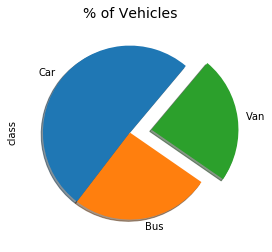

In [3]:
print (data_orig['class'].value_counts())

labels ="Car", "Bus", "Van"

plt.title("% of Vehicles", fontsize=14)
data_orig["class"].value_counts().plot.pie(explode=[0,0,0.25],labels=labels, shadow=True, startangle=50)

plt.show()

### Step 4 - Descriptive Statistics

    Print the descriptive statistics of each & every column using describe() function. Few observations
    
    1. Some of the features seem to have missing values
    2. All features have >0 standard deviation so they need to be considered for modelling

In [4]:
data_orig.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### Step 5 - Check Data type of each attribute

In [5]:
data_orig.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### Step 6 - Shape of the data

In [6]:
data_orig.shape

(846, 19)

### Step 7 - Checking the presence of missing values

    We see that there missing values in the dataset. Since the dataset is small, we will not remove records in which some features have missing values. We will impute the data using some statistical measure like 'mean', 'median'

In [7]:
# Check for missing value
data_orig.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Step 8 - Univariate feature imputation

    We will impute the missing value for those features which have some values missing. We will impute the value using the 'mean' of the other values which are available for that feature. 
    
    As future extension to this implementation we could try with 'median' and compare the impact of that on the accuracy of the problem

In [8]:
from sklearn.impute import SimpleImputer

data_without_target = data_orig.drop(['class'],axis=1)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data_without_target))
data.columns = data_without_target.columns
data.index = data_without_target.index

data['class'] = data_orig['class']

In [9]:
#Re-check for missing value, there should be none now
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Step 9 - Check Standard Deviation of all numeric attributes

    All attributes have some standard deviation and hence they would not be dropped - for now

In [10]:
data.std()

compactness                      8.234474
circularity                      6.133943
distance_circularity            15.740902
radius_ratio                    33.400979
pr.axis_aspect_ratio             7.882119
max.length_aspect_ratio          4.601217
scatter_ratio                   33.195188
elongatedness                    7.811559
pr.axis_rectangularity           2.588326
max.length_rectangularity       14.515652
scaled_variance                 31.355195
scaled_variance.1              176.457706
scaled_radius_of_gyration       32.546223
scaled_radius_of_gyration.1      7.468450
skewness_about                   4.903148
skewness_about.1                 8.930792
skewness_about.2                 6.152166
hollows_ratio                    7.438797
dtype: float64

### Step 10 - Outlier Detection

    We will use BoxPlot to check if there are any outliers in the features which have been provided.
    
    We will identify such features and in next step we will remove the ourlier values.

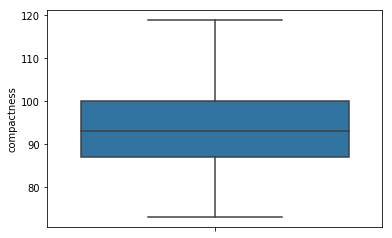

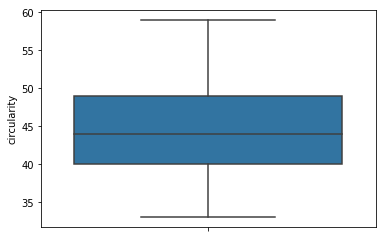

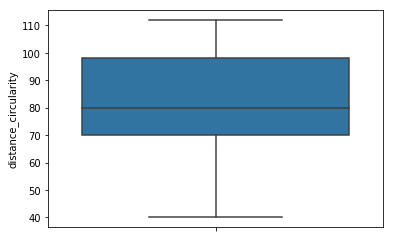

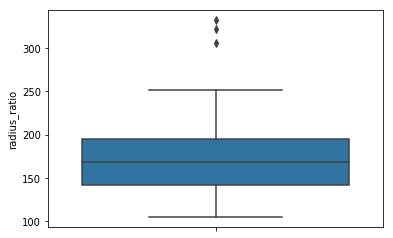

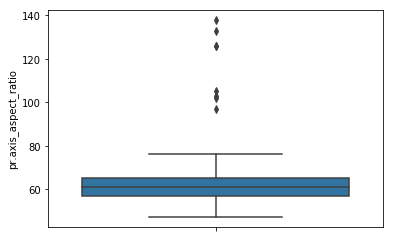

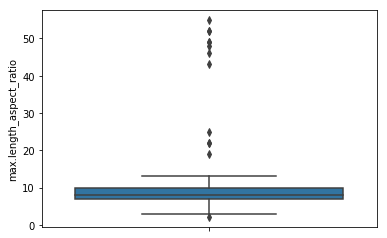

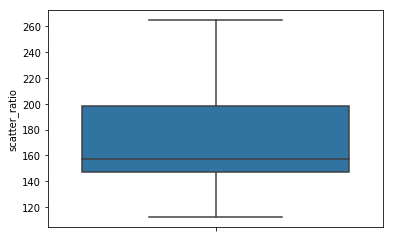

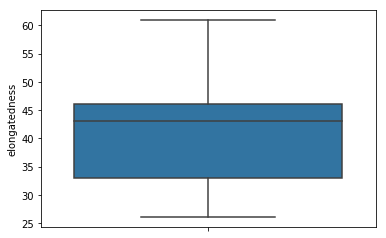

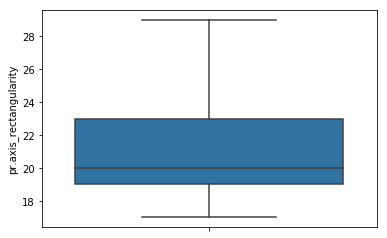

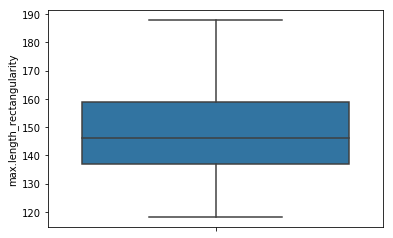

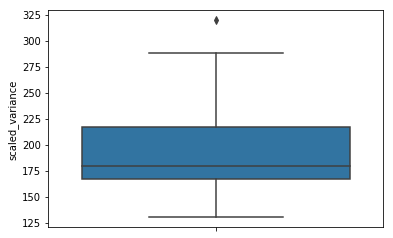

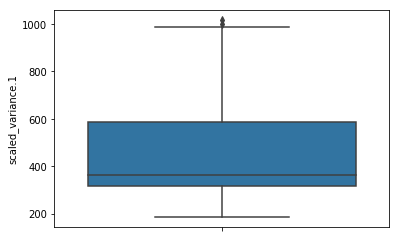

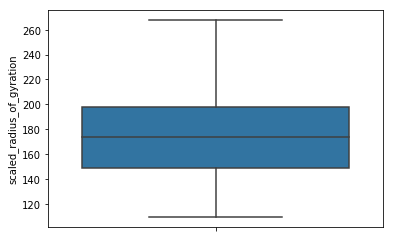

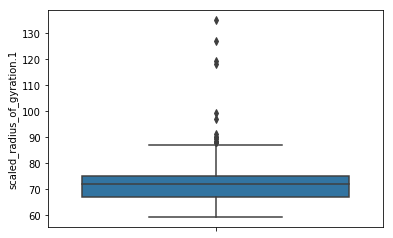

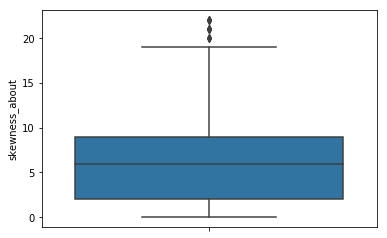

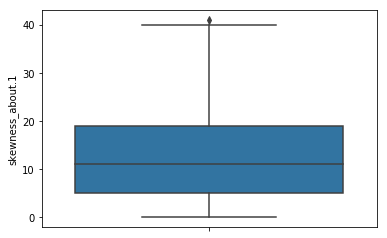

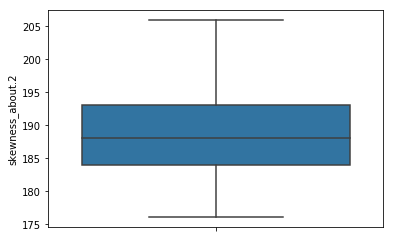

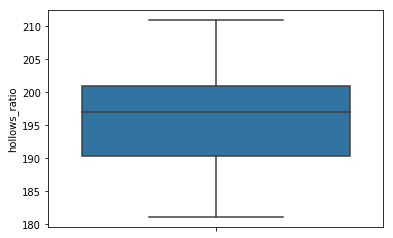

In [11]:
for col in data.columns:
    if (data[col].dtype != 'object'):
        sns.boxplot(data[col], orient='v')
        plt.show()

### Step 11 - Five point summary of numerical attributes

In [12]:
def print_five_point_summary(feature, feature_name, do_print=True):
    median = np.median(feature)
    
    sorted_feature_data = sorted(feature)
    q1, q3= np.percentile(sorted_feature_data,[25,75])

    min_value = np.min(sorted_feature_data)
    max_value = np.max(sorted_feature_data)

    if do_print:
        print ('\nPrinting 5 point summary for %s'%(feature_name))
        print ('-----------------------------------')
        print ('\nMax value of %s is %d'%(feature_name, max_value))
        print ('Min value of %s is %d'%(feature_name, min_value))
        print ('Median value of %s is %d'%(feature_name, median))
        print ('1st Quartile value of %s is %d'%(feature_name, q1))
        print ('3rd Quartile value of %s is %d'%(feature_name, q3))

    five_point_summary = {'median':median,
                         'q1':q1,
                         'q3':q3,
                         'minvalue':min_value,
                         'max_value':max_value}
    return five_point_summary

In [13]:
for col in data.columns:
    if (data[col].dtype != 'object'):
        print_five_point_summary(data[col], col)


Printing 5 point summary for compactness
-----------------------------------

Max value of compactness is 119
Min value of compactness is 73
Median value of compactness is 93
1st Quartile value of compactness is 87
3rd Quartile value of compactness is 100

Printing 5 point summary for circularity
-----------------------------------

Max value of circularity is 59
Min value of circularity is 33
Median value of circularity is 44
1st Quartile value of circularity is 40
3rd Quartile value of circularity is 49

Printing 5 point summary for distance_circularity
-----------------------------------

Max value of distance_circularity is 112
Min value of distance_circularity is 40
Median value of distance_circularity is 80
1st Quartile value of distance_circularity is 70
3rd Quartile value of distance_circularity is 98

Printing 5 point summary for radius_ratio
-----------------------------------

Max value of radius_ratio is 333
Min value of radius_ratio is 104
Median value of radius_ratio is 

### Step 12 - Remove outlier values using zscore

In [14]:
from scipy.stats import zscore

def remove_outliers (df, feature_name):
    
    rows_before = df.shape[0]
    
    feature_name_zscore = feature_name+'_zscore'
    
    df[feature_name_zscore] = zscore(df[feature_name])
    condition = (df[feature_name_zscore]>3) | (df[feature_name_zscore]<-3)
    df = df.drop(df[condition].index, axis=0, inplace=False)
    df = df.drop([feature_name_zscore], axis=1)
    
    rows_after = df.shape[0]
    
    print ('Number of rows which had outlier value for %s are %d'%(feature_name, (rows_before-rows_after)))
    #sns.boxplot(df[feature_name], orient='v')
    
    return df

In [15]:
data = remove_outliers(data, 'radius_ratio')
data = remove_outliers(data, 'pr.axis_aspect_ratio')
data = remove_outliers(data, 'max.length_aspect_ratio')
data = remove_outliers(data, 'scaled_variance')
data = remove_outliers(data, 'scaled_variance.1')
data = remove_outliers(data, 'scaled_radius_of_gyration.1')
data = remove_outliers(data, 'skewness_about')
data = remove_outliers(data, 'skewness_about.1')

Number of rows which had outlier value for radius_ratio are 3
Number of rows which had outlier value for pr.axis_aspect_ratio are 5
Number of rows which had outlier value for max.length_aspect_ratio are 4
Number of rows which had outlier value for scaled_variance are 5
Number of rows which had outlier value for scaled_variance.1 are 3
Number of rows which had outlier value for scaled_radius_of_gyration.1 are 0
Number of rows which had outlier value for skewness_about are 4
Number of rows which had outlier value for skewness_about.1 are 2


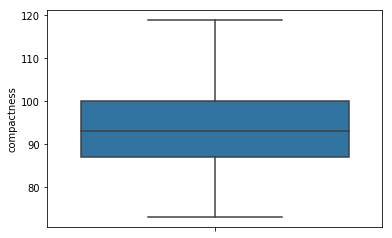

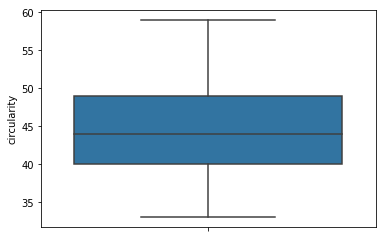

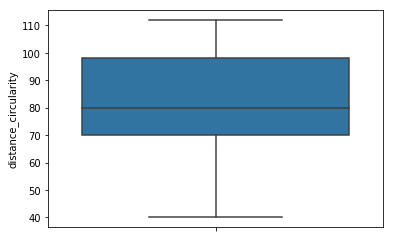

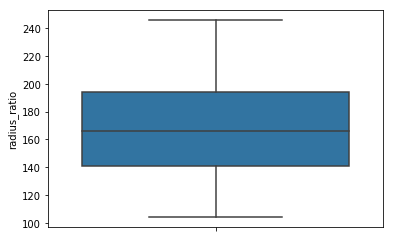

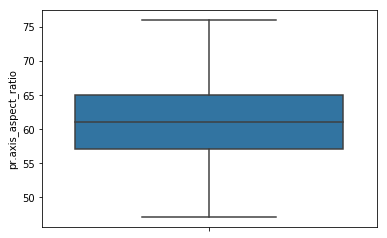

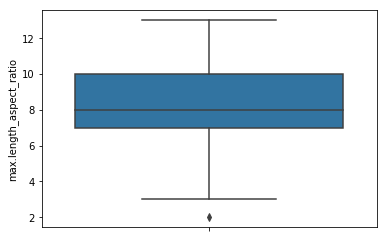

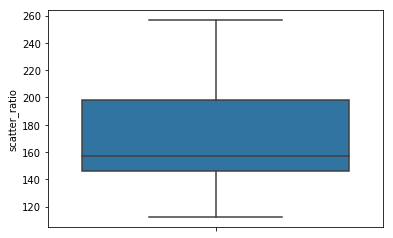

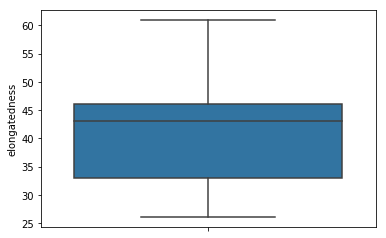

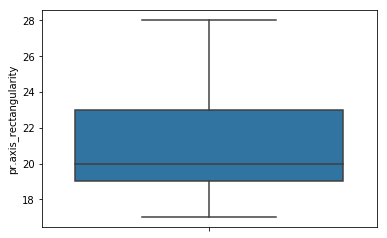

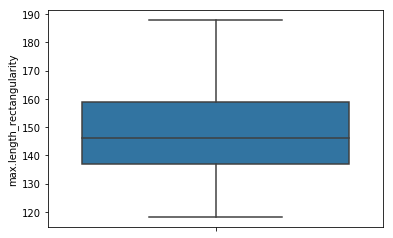

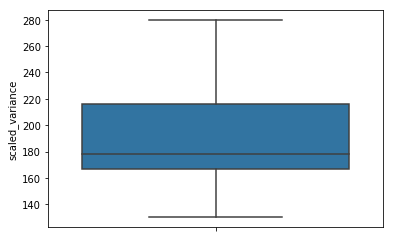

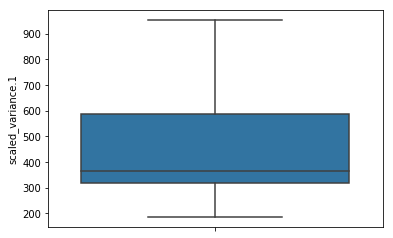

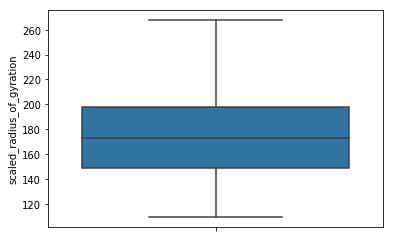

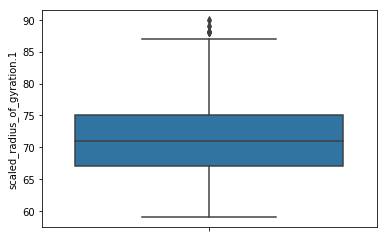

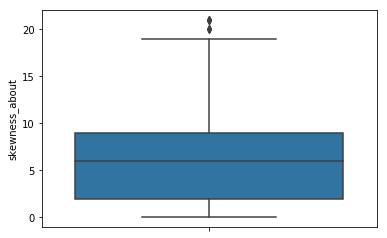

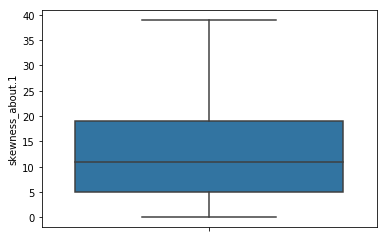

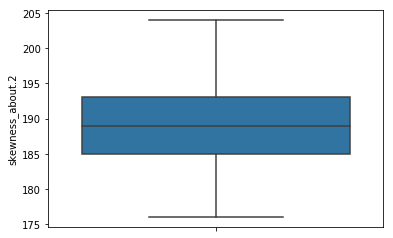

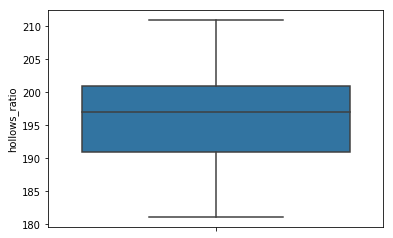

In [16]:
for col in data.columns:
    if (data[col].dtype != 'object'):
        sns.boxplot(data[col], orient='v')
        plt.show()

### Step 13 - Relationship between Different Features

    We will plot a pairplot of all the features in the dataset. This plot gives visual clues to identify the dataset suffers from multicollinearity. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model
    
    In our dataset we will see that there many features which are highly correlated to each other, i.e. positive or negative correlation

C:\MachineLearning\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


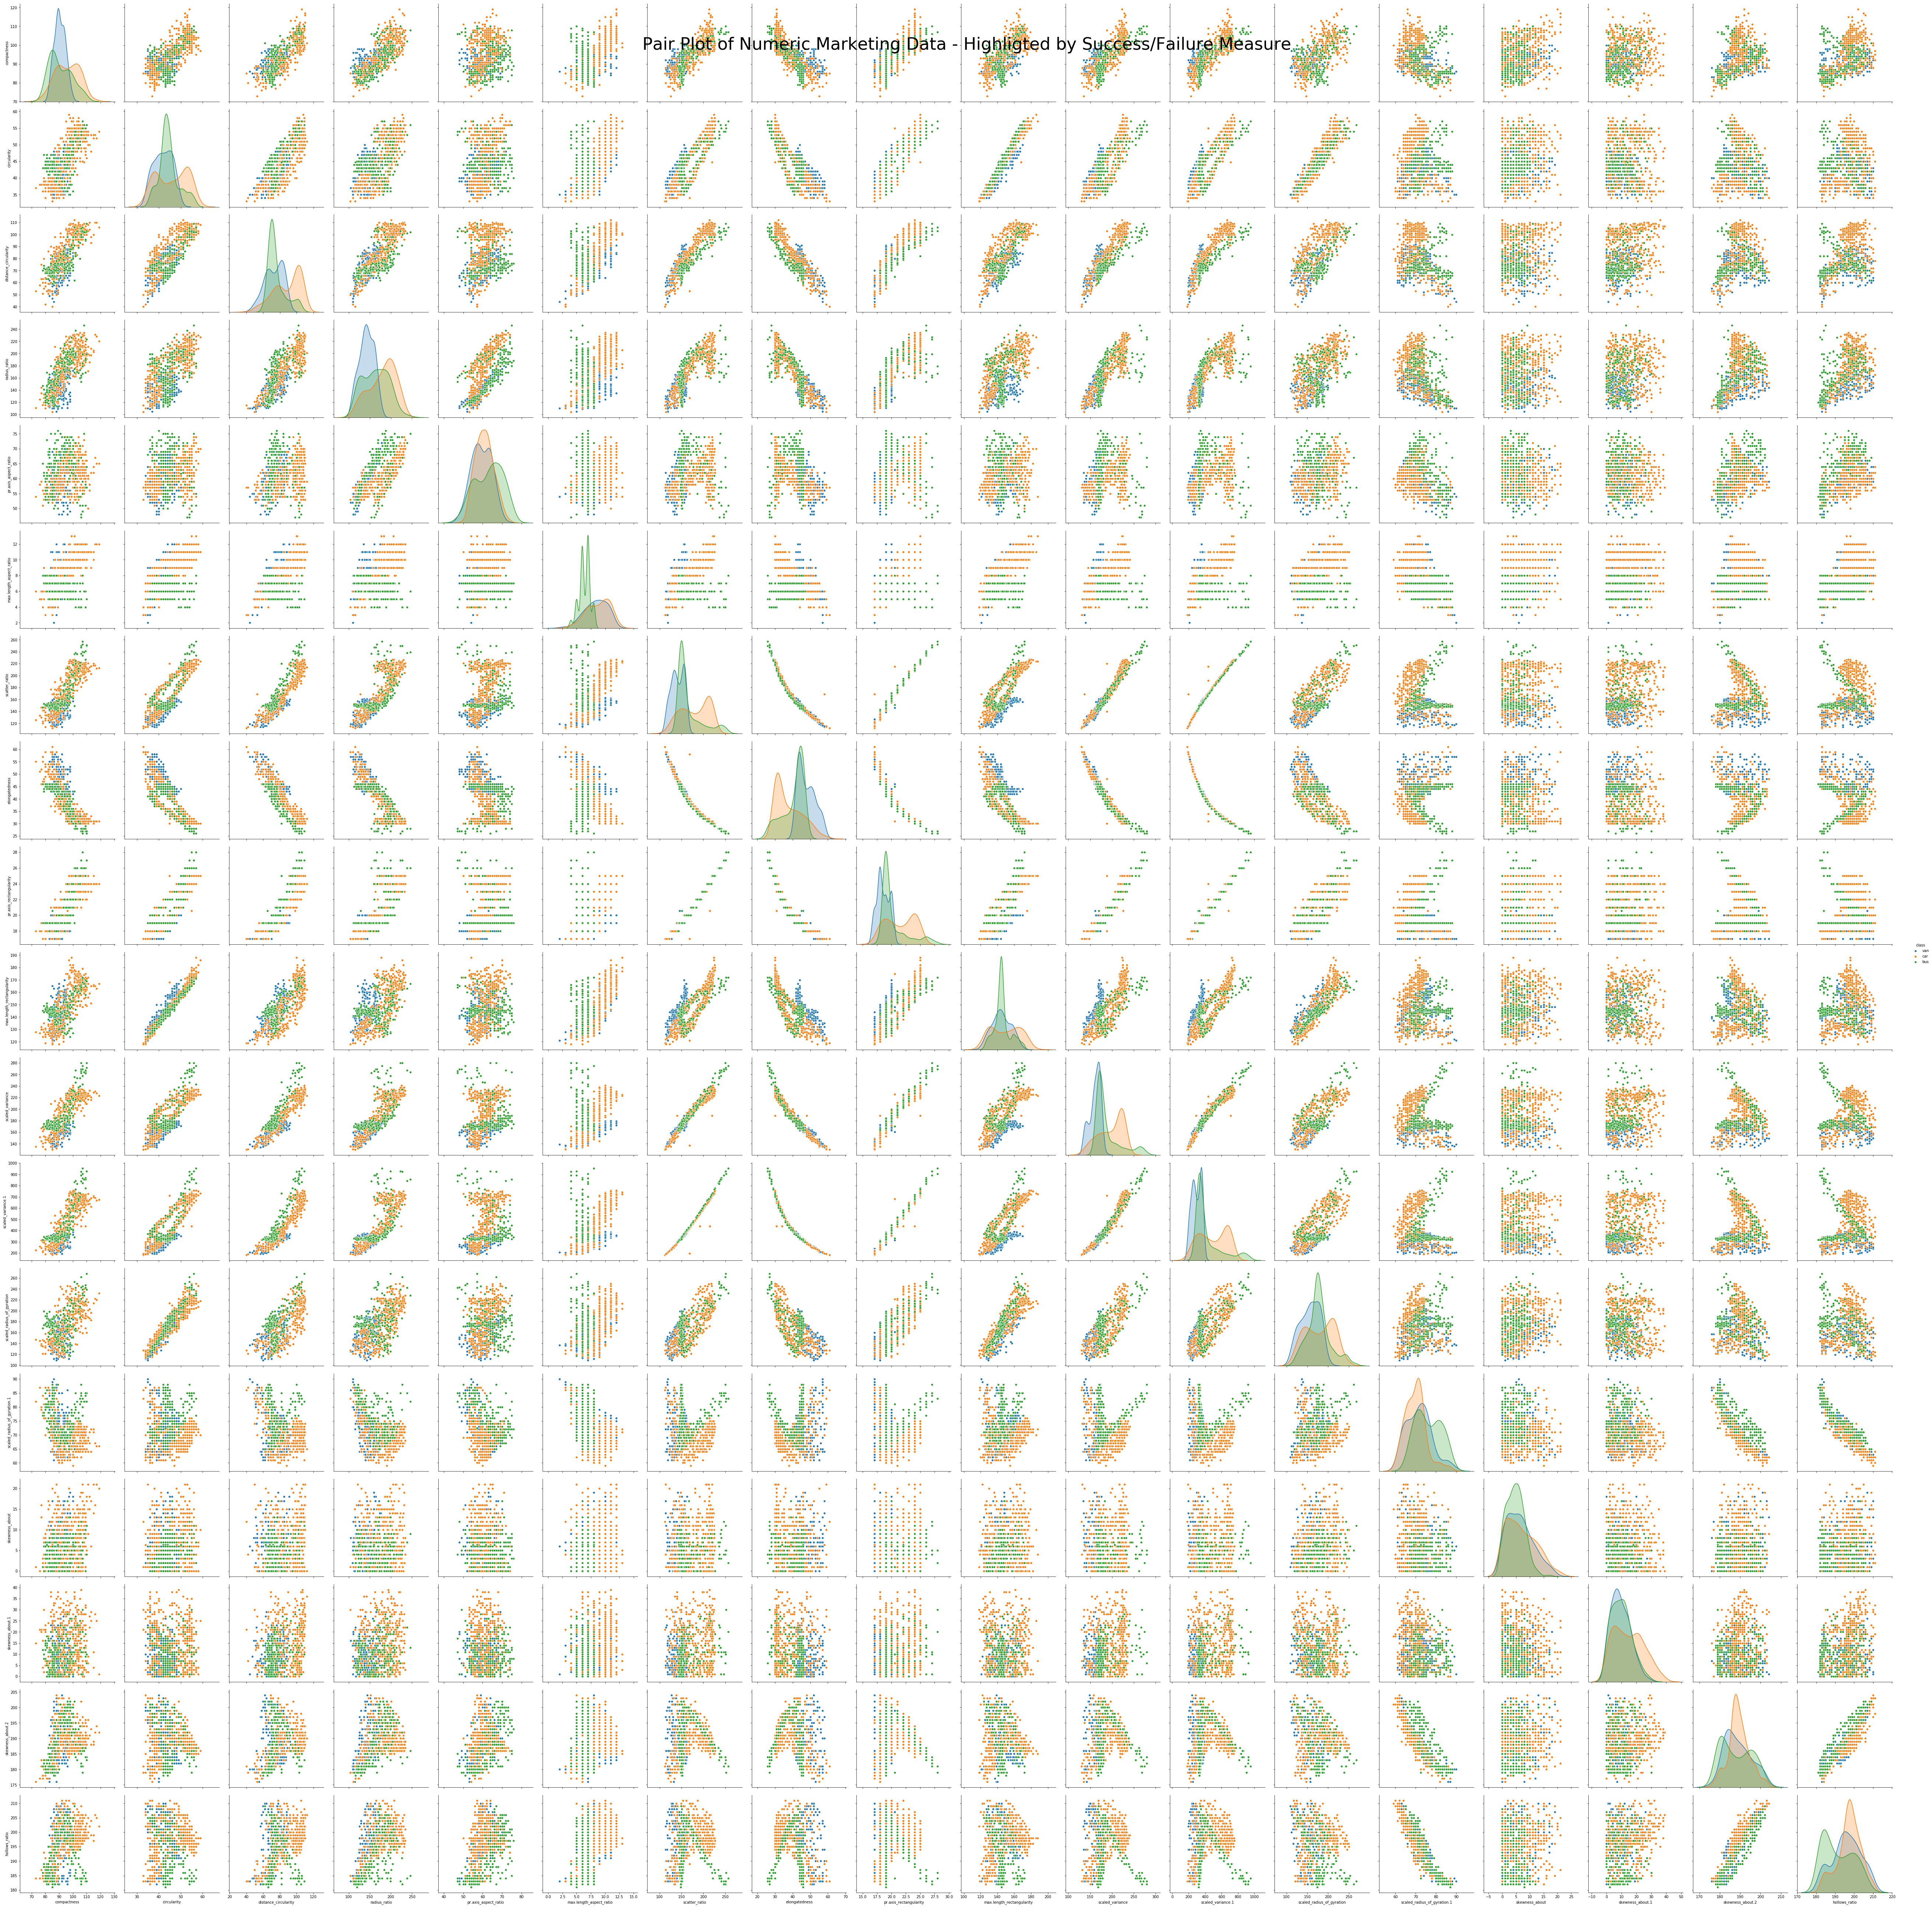

In [17]:
sns.pairplot(data, hue='class',size=4)
plt.suptitle('Pair Plot of Numeric Marketing Data - Highligted by Success/Failure Measure', size = 46);

#### Example of Highly Positive Correlation in features

Text(0.5, 1.0, 'Relationship b/w scaled variance & compactness')

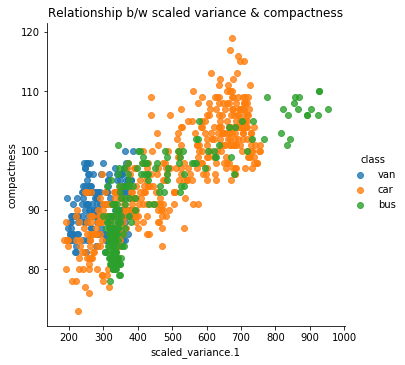

In [18]:
sns.lmplot(x='scaled_variance.1',y='compactness',hue='class', data=data, fit_reg=False)
plt.xlabel('scaled_variance.1')
plt.ylabel('compactness')
plt.title('Relationship b/w scaled variance & compactness')

Text(0.5, 1.0, 'Relationship b/w scaled variance & scatter_ratio')

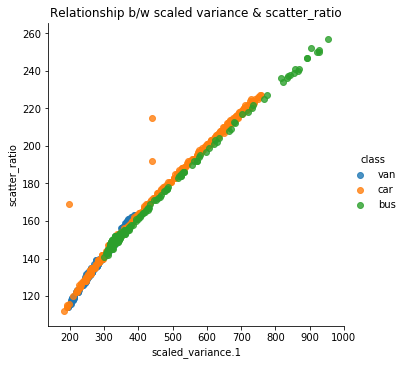

In [19]:
sns.lmplot(x='scaled_variance.1',y='scatter_ratio',hue='class', data=data, fit_reg=False)
plt.xlabel('scaled_variance.1')
plt.ylabel('scatter_ratio')
plt.title('Relationship b/w scaled variance & scatter_ratio')

#### Example of Highly Negative Correlation in features

Text(0.5, 1.0, 'Relationship b/w distance_circularity & elongatedness')

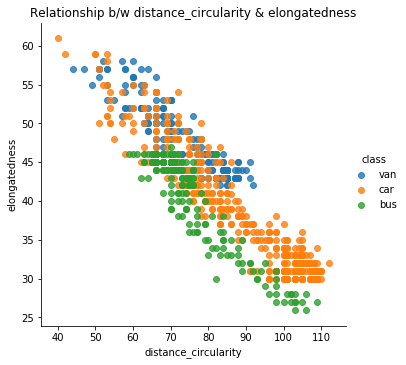

In [20]:
sns.lmplot(x='distance_circularity',y='elongatedness',hue='class', data=data, fit_reg=False)
plt.xlabel('distance_circularity')
plt.ylabel('elongatedness')
plt.title('Relationship b/w distance_circularity & elongatedness')

Text(0.5, 1.0, 'Relationship b/w scatter_ratio & elongatedness')

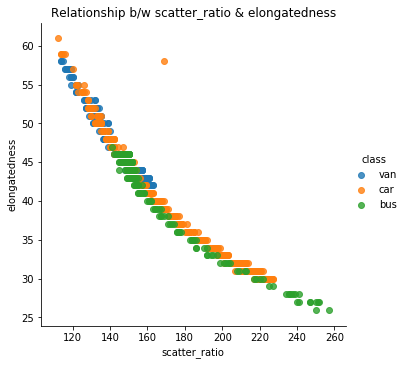

In [21]:
sns.lmplot(x='scatter_ratio',y='elongatedness',hue='class', data=data, fit_reg=False)
plt.xlabel('scatter_ratio')
plt.ylabel('elongatedness')
plt.title('Relationship b/w scatter_ratio & elongatedness')

### Step 14 - Finding Correlation Matrix with Heatmap

    - One of the other ways we can find correlation for this dataset is to plot a HeatMap which would show corerelation between each feature.

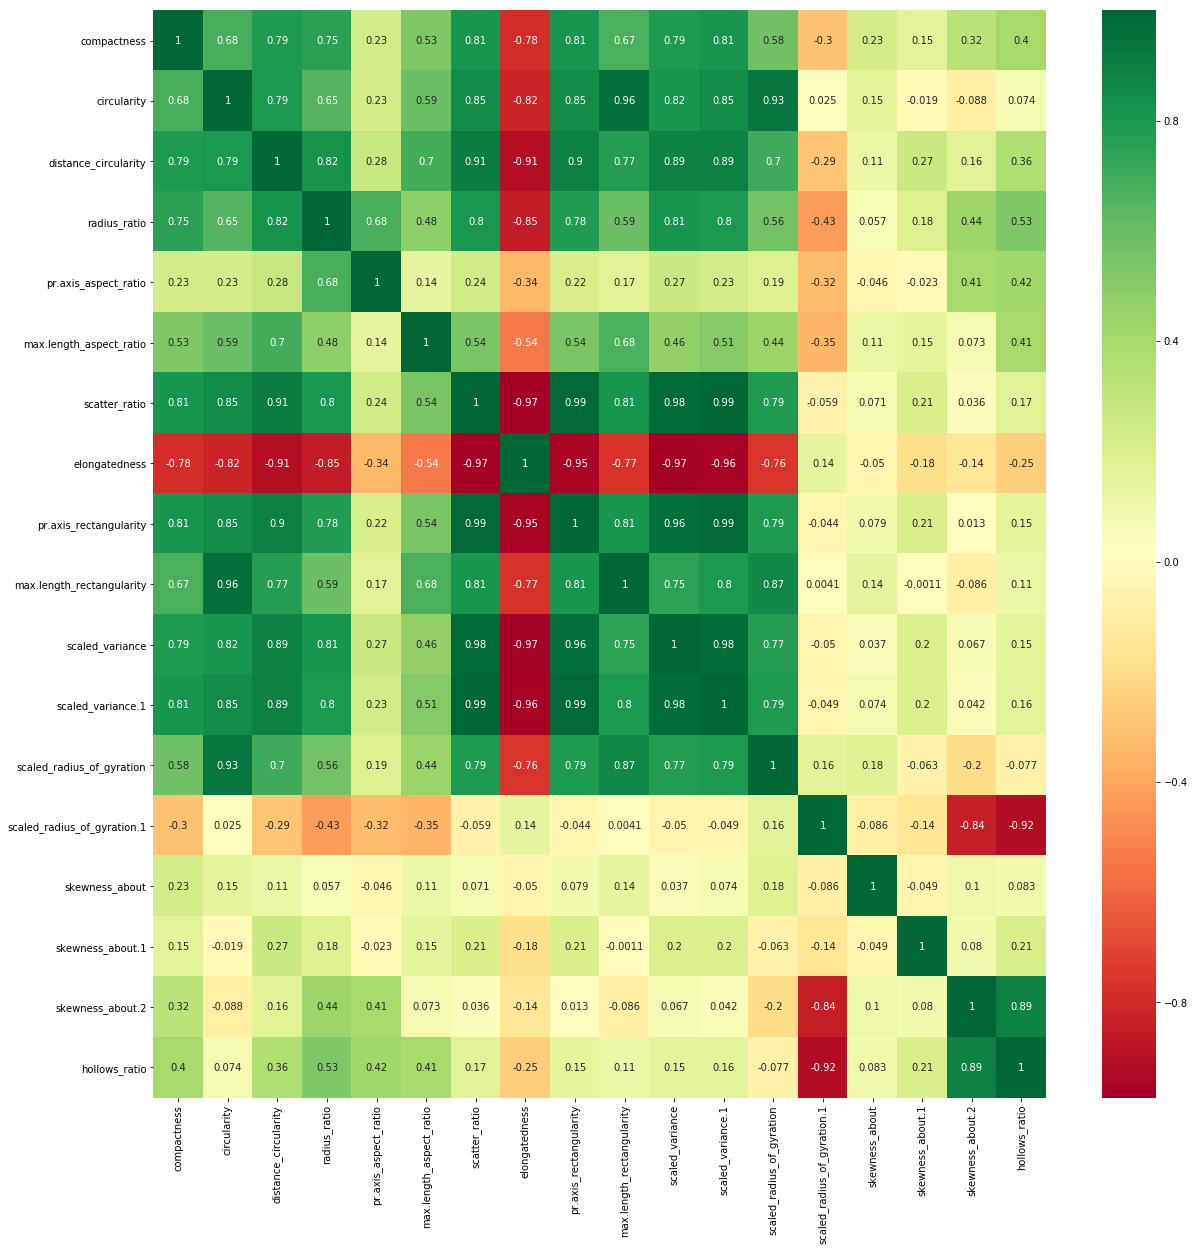

In [22]:
corelation_matrix = data.corr()
top_corelation_features = corelation_matrix.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corelation_features].corr(), annot=True, cmap='RdYlGn')

### Step 15 -  Scaling Data

In [23]:
# Get all column names
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

scaled_data = scaler.fit_transform(data[cols_to_scale])
scaled_data = pd.DataFrame(data=scaled_data, columns=cols_to_scale)

scaled_data.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.174142     0.530875              0.065950      0.322357   
1    -0.318685    -0.616200              0.129756     -0.835668   
2     1.283002     0.858610              1.533479      1.292594   
3    -0.072271    -0.616200              0.002144     -0.272305   
4     0.420555    -0.288465             -0.572106      0.165867   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.929703                 0.899577      -0.194617   
1             -0.750548                 0.419646      -0.597383   
2              0.857602                 0.899577       1.199577   
3              0.321552                 0.419646      -0.752294   
4              0.678919                -1.020144      -0.473455   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.126187               -0.211572                   0.774930   
1       0.513696               -0.611549                  -0.330789   
2      -1.165509                0.988360                   0.705823   
3       0.642866               -0.611549                  -0.330789   
4       0.126187               -0.611549                  -0.330789   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.380416          -0.333975                   0.313275   
1        -0.583088          -0.622446                  -0.503074   
2         1.207176           1.173140                   1.443605   
3        -0.920873          -0.746076                  -1.476414   
4        -0.380416          -0.439944                  -0.063501   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.319260       -0.064869          0.396975   
1                     0.001017        0.558026          0.170400   
2                     0.161156        1.596183         -0.396036   
3                    -1.440231       -0.064869         -0.282749   
4                    -0.959815        1.388551         -1.302334   

   skewness_about.2  hollows_ratio  
0         -0.327731       0.172405  
1         -0.000781       0.444798  
2         -0.164256       0.036208  
3          1.633967       1.534370  
4          1.797442       1.125781

### Step 16 - Dimension reduction using PCA (Principal Component Analysis)

    - Since the dataset we have suffers from MultiCollinearity we would need to use PCA to reduce the dimensionality of the dataset.
    
    - We would now see if we can reduce the dimension of the above dataset. 
    - We will find that we can explain 95% of variance in the data using just 7 components. This means we can use these 7 components to train a classifier instead of original 18 features

In [25]:
from sklearn.decomposition import PCA

print ('Shape or processed dataset is ', scaled_data.shape)

z = PCA(0.95)
pca_model = z.fit(scaled_data)
pca_components = pca_model.transform(scaled_data)

print ('Shape of pca components is ', pca_components.shape)
print ('Explained variance for each component is ', pca_model.explained_variance_ratio_)

Shape or processed dataset is  (820, 18)
Shape of pca components is  (820, 7)
Explained variance for each component is  [0.55257491 0.18215655 0.06712427 0.06340996 0.04746112 0.03499626
 0.01788623]


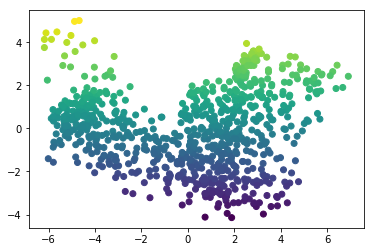

In [26]:
plt.scatter(pca_components[:,0], pca_components[:,1], c=pca_components[:,1])

#### Understading PCA - What does it mean really ?

    - First, in above few lines of code we have done the following:
        - Configured PCA to modify the data so that we get lesser number of features and that those features explain 95% of variance in the data
        - Reduced the dimension of data from 18 features to 7 features.
        - These 7 features are completely new features and do not map to earlier 20 features
        - Variance ratio tells that what %age of data variance can these features explain. For e.g. feature 1 can explain 66% variance in data, feature 2 can explain 10% variance etc. etc.

### Step 17 - PCA Components and their Explained Variance

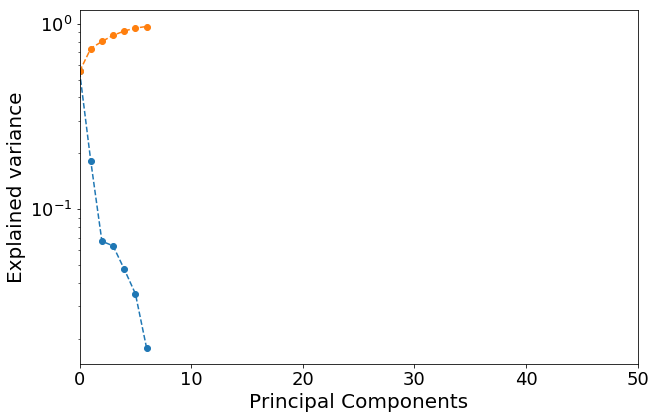

In [27]:
plt.figure(figsize=(10,6.5))
plt.semilogy(pca_model.explained_variance_ratio_,'--o')
plt.semilogy(pca_model.explained_variance_ratio_.cumsum(),'--o')
plt.xlabel('Principal Components', fontsize=20)
plt.ylabel('Explained variance', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0,50])
plt.show()

### Step 18 - Prepare input data to be used for classification

In [28]:
X = pca_components
y = data['class']

print (X.shape)
print (y.shape)

(820, 7)
(820,)


### Step 19 - One Hot encode the class labels

    One Hot Encode the target labels so that they are now in numeric form (0,1,2)

In [29]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

### Step 20 - Hyperparameter Tuning

    We will use GridSearch to identify the right value for C and Kernel parameters.
    Additionally we will specify a cross validation scheme, in this case KFold with 5 folds. This way we search the hyper-parameter space for the best cross validation score.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X,y)

params ={'C':[0.01, 0.05, 0.5, 1],
        'kernel':['rbf','linear'],
        'gamma': ['auto']}

classifier = GridSearchCV(estimator=svm.SVC(), cv=KFold(5), param_grid=params, scoring='accuracy')
classifier.fit(trainX, trainY)

means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
    
print ('Best found parameters on this dataset are ', classifier.best_params_)

0.509 (+/-0.132) for {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
0.834 (+/-0.037) for {'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
0.597 (+/-0.144) for {'C': 0.05, 'gamma': 'auto', 'kernel': 'rbf'}
0.852 (+/-0.045) for {'C': 0.05, 'gamma': 'auto', 'kernel': 'linear'}
0.922 (+/-0.035) for {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
0.854 (+/-0.045) for {'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}
0.922 (+/-0.028) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.852 (+/-0.054) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

Best found parameters on this dataset are  {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}


### Step 21 - Run SVM using best hyper parameters

    We apply the best hyper params and train a new model with these learnt parameters

In [31]:
svm_classifier = svm.SVC(C=1, kernel='rbf', gamma='auto')
svm_classifier.fit(trainX, trainY)
predictedY = svm_classifier.predict(testX)

### Step 22 - Evaluate Training Performance

#### Accuracy, Precision, Recall, F1-Score and Confusion Matrix

In [32]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


print ('Confusion matrix using SVM \n', confusion_matrix(testY, predictedY))
print ('Accuracy of LogisticRegression model using balanced dataset is-',accuracy_score(testY, predictedY))
print ('Recall of LogisticRegression model using balanced dataset is-',recall_score(testY, predictedY, average='weighted'))
print ('F1-score of LogisticRegression model using balanced dataset is-',f1_score(testY, predictedY, average='weighted'))

Confusion matrix using SVM 
 [[ 43   2   0]
 [  2 103   5]
 [  2   7  41]]
Accuracy of LogisticRegression model using balanced dataset is- 0.9121951219512195
Recall of LogisticRegression model using balanced dataset is- 0.9121951219512195
F1-score of LogisticRegression model using balanced dataset is- 0.9114420624229743


#### Plotting Confusion Matrix of Classification Model

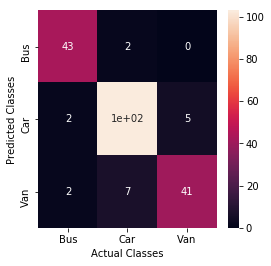

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testY, predictedY)
df = pd.DataFrame(data=cm, index=['Bus','Car','Van'], columns=['Bus','Car','Van'])
plt.figure(figsize=(4,4))
sns.heatmap(df, annot=True)
plt.xlabel('Actual Classes')
plt.ylabel('Predicted Classes')
plt.show()

#### TODO - ROC curve for multi-class classification

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html